# Logistic Regression on Titanic dataset

__The goal is to predict survival of passengers traveling in RMS Titanic using Logistic Regression.__

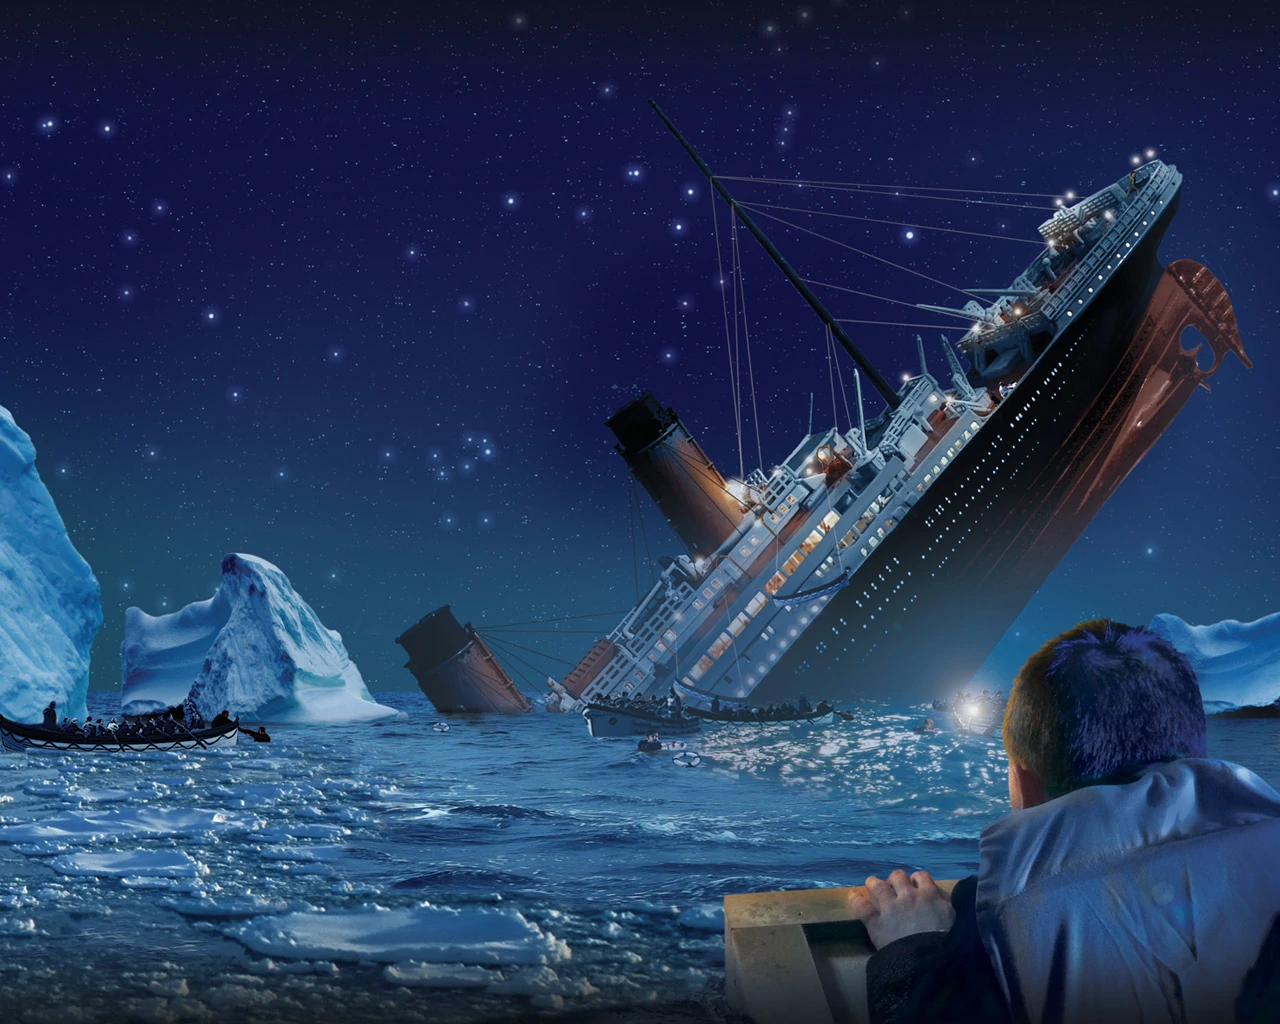

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("titanic.csv")
df.shape

(891, 12)

In [3]:
df.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

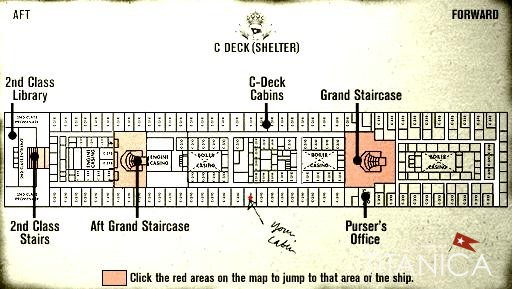

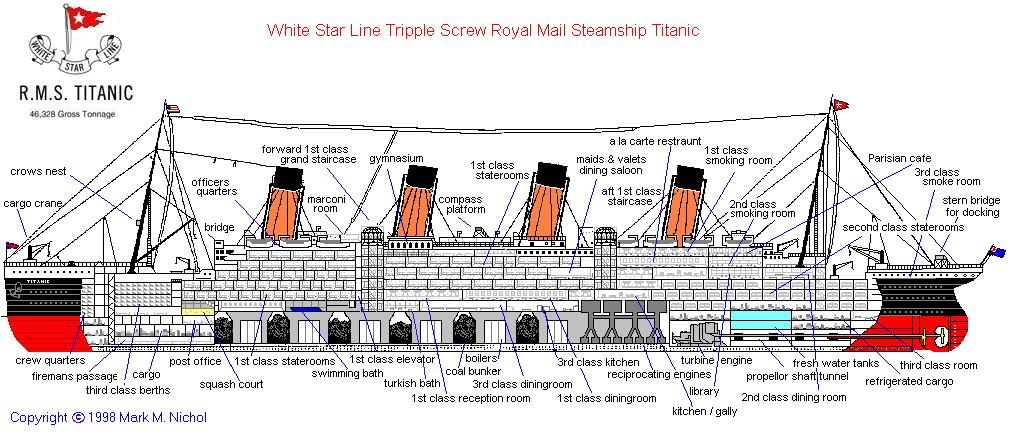

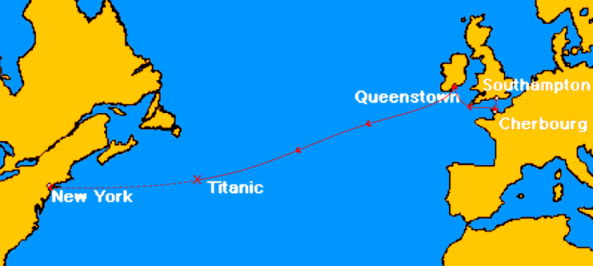

In [4]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [5]:
df.Survived.value_counts()

0    549
1    342
Name: Survived, dtype: int64

Only 342 passengers survived out of 891.

In [6]:
 df.Survived.value_counts(normalize=True)*100

0    61.616162
1    38.383838
Name: Survived, dtype: float64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [8]:
cols = ['Survived', 'Pclass', 'Sex', 'Embarked']
for c in cols:
    print(df[c].value_counts(),"\n")
    print(df[c].value_counts(normalize=True)*100)
    print("="*70)

0    549
1    342
Name: Survived, dtype: int64 

0    61.616162
1    38.383838
Name: Survived, dtype: float64
3    491
1    216
2    184
Name: Pclass, dtype: int64 

3    55.106622
1    24.242424
2    20.650954
Name: Pclass, dtype: float64
male      577
female    314
Name: Sex, dtype: int64 

male      64.758698
female    35.241302
Name: Sex, dtype: float64
S    644
C    168
Q     77
Name: Embarked, dtype: int64 

S    72.440945
C    18.897638
Q     8.661417
Name: Embarked, dtype: float64


In [9]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [10]:
df.isna().sum().sort_values(ascending=False)

Cabin          687
Age            177
Embarked         2
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
SibSp            0
Parch            0
Ticket           0
Fare             0
dtype: int64

In [11]:
df.shape

(891, 12)

In [12]:
df.drop(['Cabin'], axis=1, inplace=True)
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         2
dtype: int64

In [13]:
df.isna().sum().sort_values(ascending=False)

Age            177
Embarked         2
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
SibSp            0
Parch            0
Ticket           0
Fare             0
dtype: int64

In [14]:
df.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [15]:
df.Embarked.mode()

0    S
Name: Embarked, dtype: object

In [16]:
type(df.Embarked.mode())

pandas.core.series.Series

In [17]:
df.Embarked.mode()[0]

'S'

In [18]:
df.Embarked.fillna(df.Embarked.mode()[0], inplace=True)
df.isna().sum().sort_values(ascending=False)

Age            177
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         0
dtype: int64

In [19]:
df.Age.skew()

0.38910778230082704

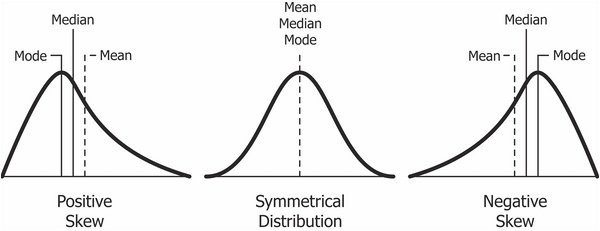

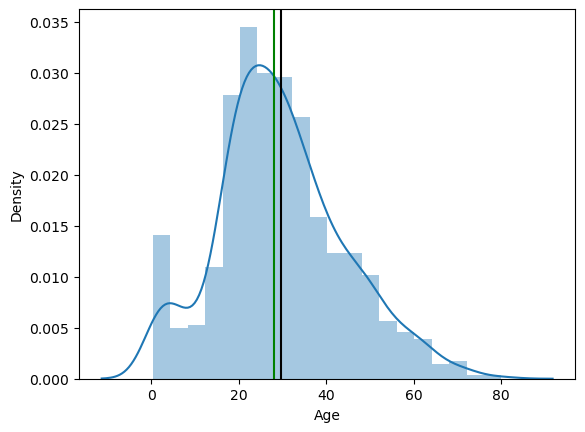

In [21]:
%matplotlib inline
sns.distplot(df.Age)
plt.axvline(df.Age.mean(), color='black')
plt.axvline(df.Age.median(), color='green')
plt.show()

In [22]:
df.Age.fillna(df.Age.mean(), inplace=True)
df.isna().sum().sort_values(ascending=False)

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

# Feature Engineering

In [23]:
df.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Embarked  
0      0         A/5 21171   7.2500        S  
1      0          PC 17599  71.2833        C  
2      0  STON/O2. 3101282   7.9250        S  
3      0            113803  53.1000        S  
4      0            373450   8.0500        S

In [24]:
df['FamilySize']  = df['SibSp'] + df['Parch'] + 1
df.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Embarked  FamilySize  
0      0         A/5 21171   7.2500        S           2  
1      0          PC 17599  71.2833        C           2  
2      0  STON/O2. 3101282   7.9250        S           1  
3      0            113803  53.1000        S           2  
4      0            373450   8.0500        S           1

In [ ]:
df.sample(7)

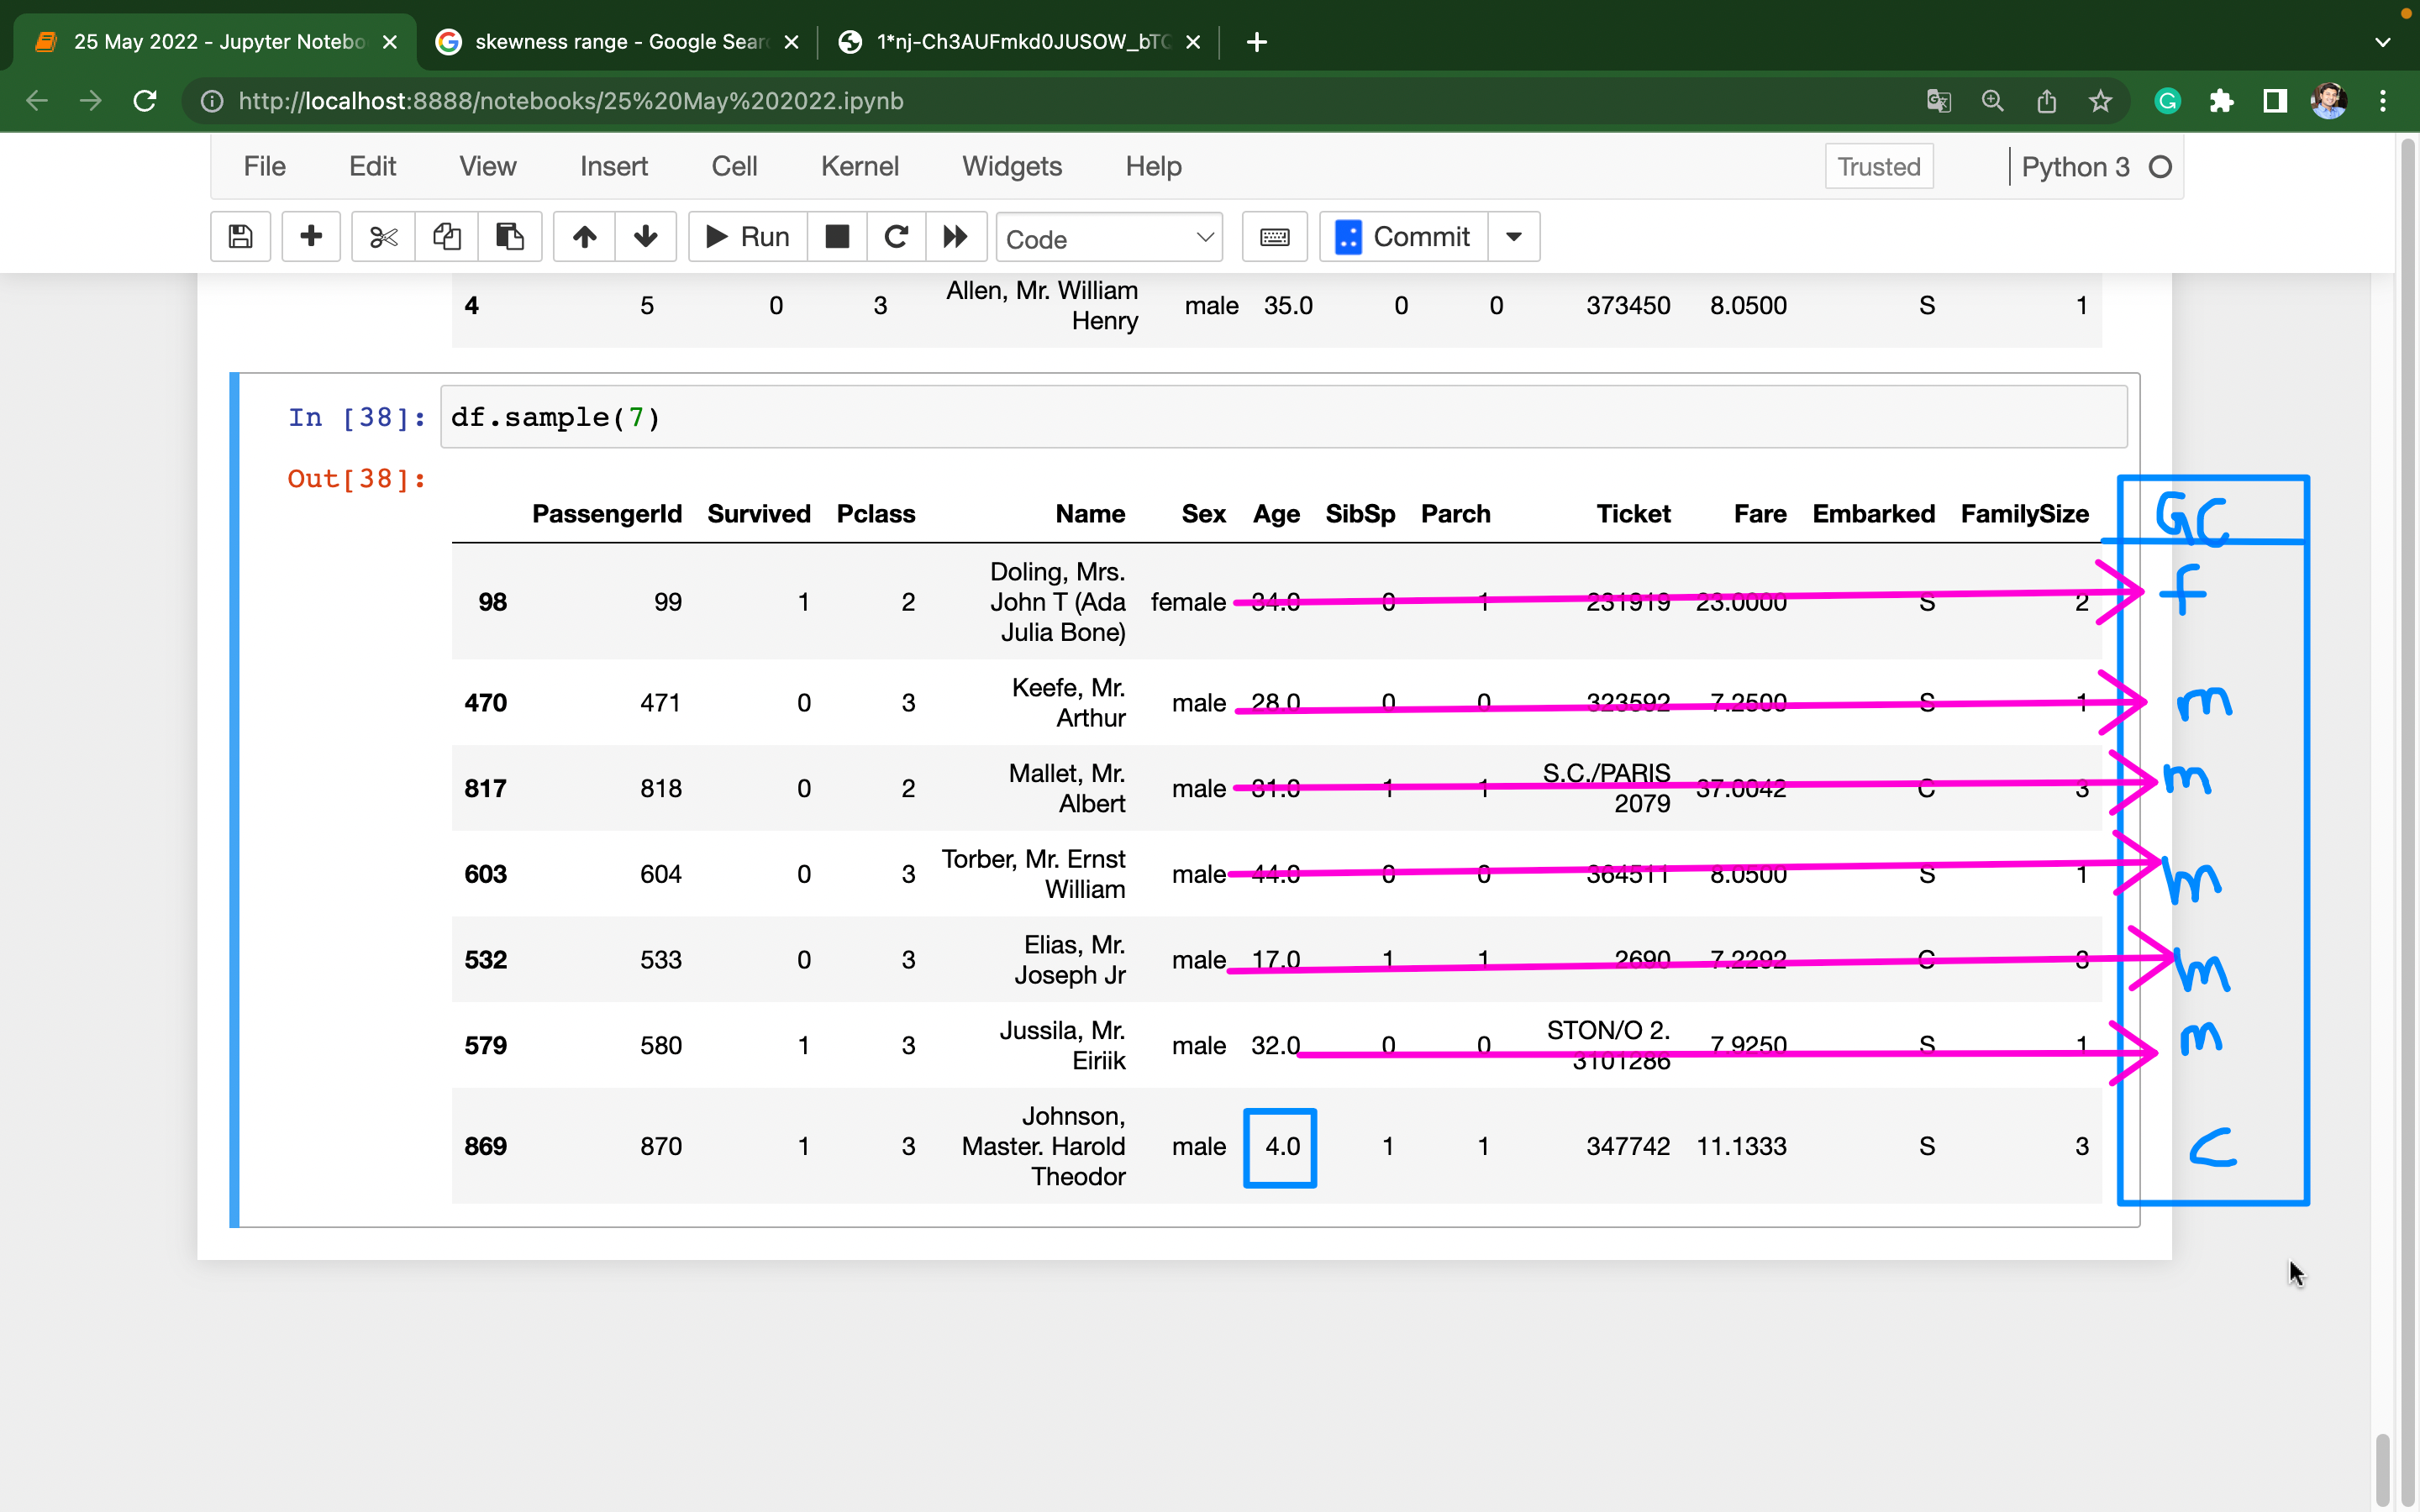

In [25]:
df['GenderClass'] = df.apply(
    lambda x: 'child' if x['Age'] < 15 else x['Sex'], axis=1)
df.sample(10)

PassengerId  Survived  Pclass  \
595          596         0       3   
890          891         0       3   
394          395         1       3   
122          123         0       2   
401          402         0       3   
102          103         0       1   
742          743         1       1   
772          773         0       2   
635          636         1       2   
756          757         0       3   

                                                  Name     Sex   Age  SibSp  \
595                        Van Impe, Mr. Jean Baptiste    male  36.0      1   
890                                Dooley, Mr. Patrick    male  32.0      0   
394  Sandstrom, Mrs. Hjalmar (Agnes Charlotta Bengt...  female  24.0      0   
122                               Nasser, Mr. Nicholas    male  32.5      1   
401                                    Adams, Mr. John    male  26.0      0   
102                          White, Mr. Richard Frasar    male  21.0      0   
742              Ryerson, Miss. Susan Parker "Suzette"  female  21.0      2   
772                                  Mack, Mrs. (Mary)  female  57.0      0   
635                                  Davis, Miss. Mary  female  28.0      0   
756                       Carlsson, Mr. August Sigfrid    male  28.0      0   

     Parch       Ticket      Fare Embarked  FamilySize GenderClass  
595      1       345773   24.1500        S           3        male  
890      0       370376    7.7500        Q           1        male  
394      2      PP 9549   16.7000        S           3      female  
122      0       237736   30.0708        C           2        male  
401      0       341826    8.0500        S           1        male  
102      1        35281   77.2875        S           2        male  
742      2     PC 17608  262.3750        C           5      female  
772      0  S.O./P.P. 3   10.5000        S           1      female  
635      0       237668   13.0000        S           1      female  
756      0       350042    7.7958        S           1        male

In [26]:
def get_genderclass(x):
    if x['Age']<15:
        return 'child'
    else:
        return x['Sex']

In [27]:
df['GenderClass_UDF'] = df.apply(get_genderclass, axis=1)

In [28]:
df.sample(5)

PassengerId  Survived  Pclass  \
498          499         0       1   
115          116         0       3   
101          102         0       3   
695          696         0       2   
662          663         0       1   

                                                Name     Sex        Age  \
498  Allison, Mrs. Hudson J C (Bessie Waldo Daniels)  female  25.000000   
115                            Pekoniemi, Mr. Edvard    male  21.000000   
101                 Petroff, Mr. Pastcho ("Pentcho")    male  29.699118   
695                       Chapman, Mr. Charles Henry    male  52.000000   
662                       Colley, Mr. Edward Pomeroy    male  47.000000   

     SibSp  Parch             Ticket      Fare Embarked  FamilySize  \
498      1      2             113781  151.5500        S           4   
115      0      0  STON/O 2. 3101294    7.9250        S           1   
101      0      0             349215    7.8958        S           1   
695      0      0             248731   13.5000        S           1   
662      0      0               5727   25.5875        S           1   

    GenderClass GenderClass_UDF  
498      female          female  
115        male            male  
101        male            male  
695        male            male  
662        male            male

In [29]:
df.drop(['GenderClass_UDF'], axis=1, inplace=True)
df.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Embarked  FamilySize GenderClass  
0      0         A/5 21171   7.2500        S           2        male  
1      0          PC 17599  71.2833        C           2      female  
2      0  STON/O2. 3101282   7.9250        S           1      female  
3      0            113803  53.1000        S           2      female  
4      0            373450   8.0500        S           1        male

In [30]:
df.GenderClass.value_counts()

male      538
female    275
child      78
Name: GenderClass, dtype: int64

In [31]:
df.GenderClass.value_counts(normalize=True)*100

male      60.381594
female    30.864198
child      8.754209
Name: GenderClass, dtype: float64

In [32]:
df.drop(['PassengerId', 'Ticket'], axis=1, inplace=True)
df.head()

Survived  Pclass                                               Name  \
0         0       3                            Braund, Mr. Owen Harris   
1         1       1  Cumings, Mrs. John Bradley (Florence Briggs Th...   
2         1       3                             Heikkinen, Miss. Laina   
3         1       1       Futrelle, Mrs. Jacques Heath (Lily May Peel)   
4         0       3                           Allen, Mr. William Henry   

      Sex   Age  SibSp  Parch     Fare Embarked  FamilySize GenderClass  
0    male  22.0      1      0   7.2500        S           2        male  
1  female  38.0      1      0  71.2833        C           2      female  
2  female  26.0      0      0   7.9250        S           1      female  
3  female  35.0      1      0  53.1000        S           2      female  
4    male  35.0      0      0   8.0500        S           1        male

In [33]:
df.drop(['Name'], axis=1, inplace=True)
df.head()

Survived  Pclass     Sex   Age  SibSp  Parch     Fare Embarked  FamilySize  \
0         0       3    male  22.0      1      0   7.2500        S           2   
1         1       1  female  38.0      1      0  71.2833        C           2   
2         1       3  female  26.0      0      0   7.9250        S           1   
3         1       1  female  35.0      1      0  53.1000        S           2   
4         0       3    male  35.0      0      0   8.0500        S           1   

  GenderClass  
0        male  
1      female  
2      female  
3      female  
4        male

In [34]:
df.corr()

Survived    Pclass       Age     SibSp     Parch      Fare  \
Survived    1.000000 -0.338481 -0.069809 -0.035322  0.081629  0.257307   
Pclass     -0.338481  1.000000 -0.331339  0.083081  0.018443 -0.549500   
Age        -0.069809 -0.331339  1.000000 -0.232625 -0.179191  0.091566   
SibSp      -0.035322  0.083081 -0.232625  1.000000  0.414838  0.159651   
Parch       0.081629  0.018443 -0.179191  0.414838  1.000000  0.216225   
Fare        0.257307 -0.549500  0.091566  0.159651  0.216225  1.000000   
FamilySize  0.016639  0.065997 -0.248512  0.890712  0.783111  0.217138   

            FamilySize  
Survived      0.016639  
Pclass        0.065997  
Age          -0.248512  
SibSp         0.890712  
Parch         0.783111  
Fare          0.217138  
FamilySize    1.000000

In [35]:
df.drop(['SibSp', 'Parch'], axis=1, inplace=True)
df.head()

Survived  Pclass     Sex   Age     Fare Embarked  FamilySize GenderClass
0         0       3    male  22.0   7.2500        S           2        male
1         1       1  female  38.0  71.2833        C           2      female
2         1       3  female  26.0   7.9250        S           1      female
3         1       1  female  35.0  53.1000        S           2      female
4         0       3    male  35.0   8.0500        S           1        male

In [36]:
df.drop(['Sex'], axis=1, inplace=True)
df.head()

Survived  Pclass   Age     Fare Embarked  FamilySize GenderClass
0         0       3  22.0   7.2500        S           2        male
1         1       1  38.0  71.2833        C           2      female
2         1       3  26.0   7.9250        S           1      female
3         1       1  35.0  53.1000        S           2      female
4         0       3  35.0   8.0500        S           1        male

In [37]:
# One Hot Encoding / Dummification
df = pd.get_dummies(df, columns=['Embarked', 'GenderClass'], 
                    drop_first=True)

In [38]:
df.head()

Survived  Pclass   Age     Fare  FamilySize  Embarked_Q  Embarked_S  \
0         0       3  22.0   7.2500           2           0           1   
1         1       1  38.0  71.2833           2           0           0   
2         1       3  26.0   7.9250           1           0           1   
3         1       1  35.0  53.1000           2           0           1   
4         0       3  35.0   8.0500           1           0           1   

   GenderClass_female  GenderClass_male  
0                   0                 1  
1                   1                 0  
2                   1                 0  
3                   1                 0  
4                   0                 1

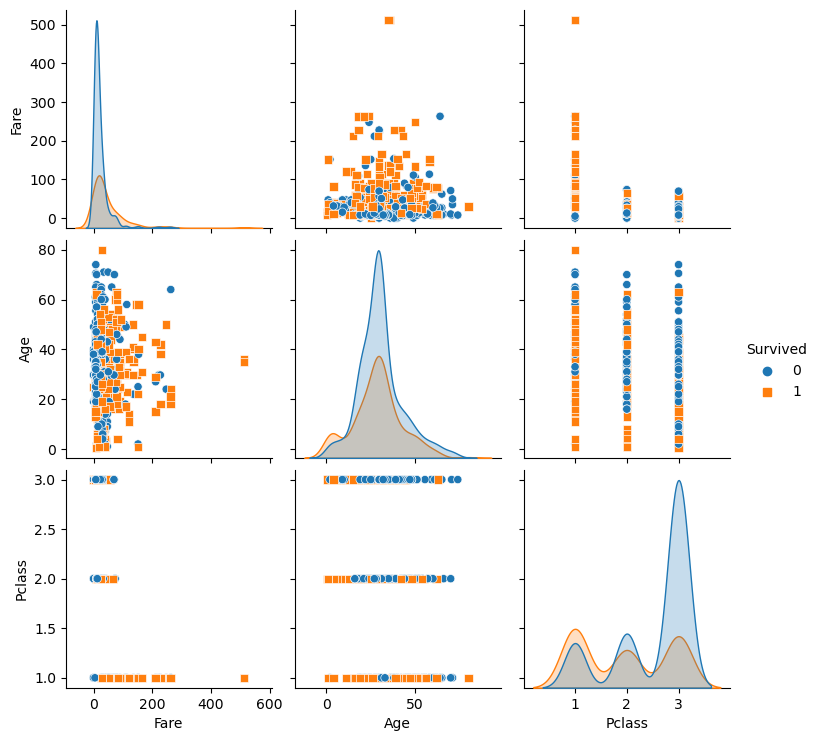

In [39]:
sns.pairplot(df[["Fare","Age","Pclass","Survived"]], 
             vars=["Fare","Age","Pclass"], 
             hue='Survived', markers=['o','s'])
plt.show()

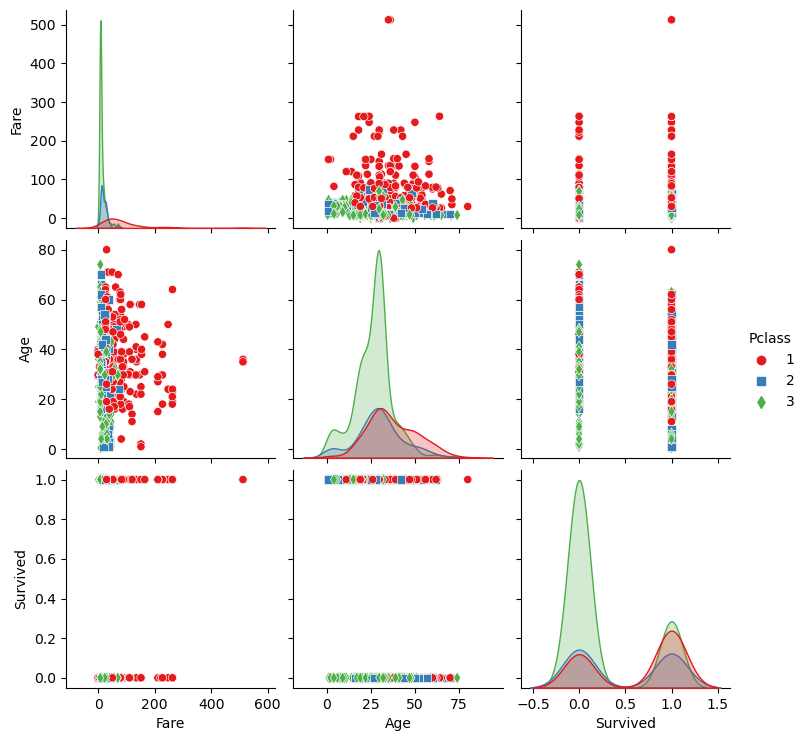

In [40]:
sns.pairplot(df[["Fare","Age","Pclass","Survived"]], vars=["Fare","Age","Survived"], 
             hue='Pclass', markers=['o','s','d'], palette='Set1')
plt.show()

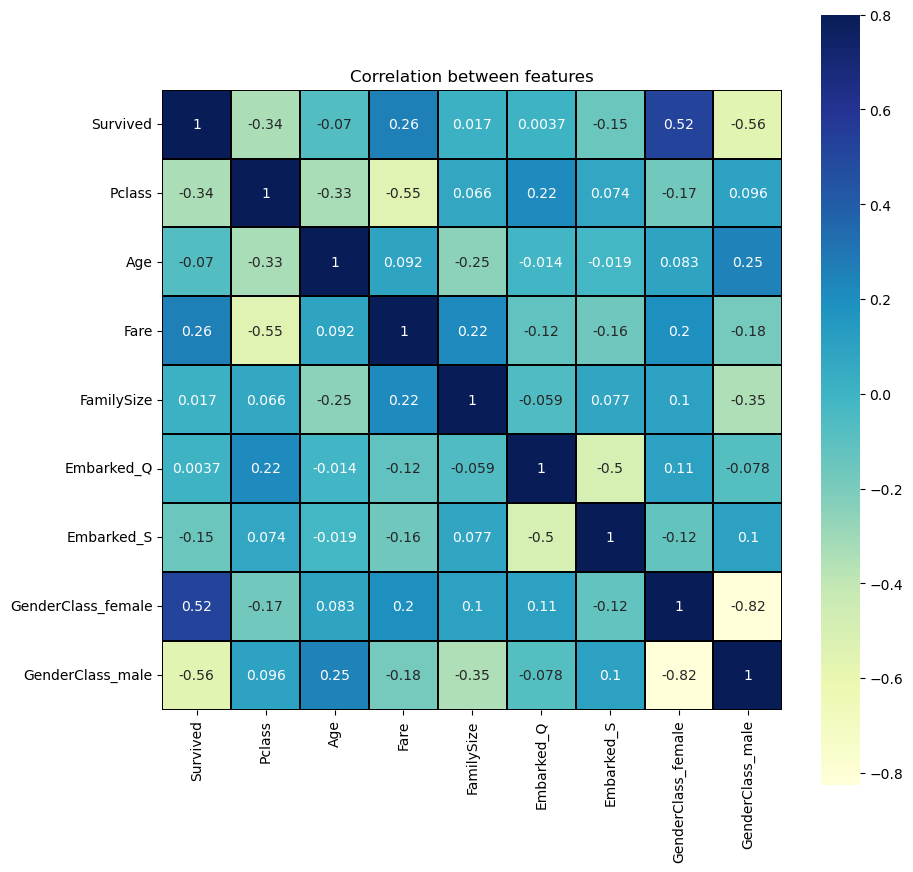

In [41]:
corr = df.corr()
plt.figure(figsize=(10, 10))
sns.heatmap(corr,
            vmax=.8,
            linewidth=.01,
            square=True,
            annot=True,
            linecolor='black',
            cmap='YlGnBu')
plt.title("Correlation between features")
plt.show()

In [42]:
df.head()

Survived  Pclass   Age     Fare  FamilySize  Embarked_Q  Embarked_S  \
0         0       3  22.0   7.2500           2           0           1   
1         1       1  38.0  71.2833           2           0           0   
2         1       3  26.0   7.9250           1           0           1   
3         1       1  35.0  53.1000           2           0           1   
4         0       3  35.0   8.0500           1           0           1   

   GenderClass_female  GenderClass_male  
0                   0                 1  
1                   1                 0  
2                   1                 0  
3                   1                 0  
4                   0                 1

In [ ]:
df.iloc[:,1:].head()

In [43]:
X = df.loc[:,df.columns != 'Survived']
X.head()

Pclass   Age     Fare  FamilySize  Embarked_Q  Embarked_S  \
0       3  22.0   7.2500           2           0           1   
1       1  38.0  71.2833           2           0           0   
2       3  26.0   7.9250           1           0           1   
3       1  35.0  53.1000           2           0           1   
4       3  35.0   8.0500           1           0           1   

   GenderClass_female  GenderClass_male  
0                   0                 1  
1                   1                 0  
2                   1                 0  
3                   1                 0  
4                   0                 1

In [44]:
y = df.Survived
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [45]:
df.shape

(891, 9)

In [46]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.20,
                                                    random_state=1)

In [47]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((712, 8), (179, 8), (712,), (179,))

In [48]:
X_train.head()

Pclass        Age     Fare  FamilySize  Embarked_Q  Embarked_S  \
301       3  29.699118  23.2500           3           1           0   
309       1  30.000000  56.9292           1           0           0   
516       2  34.000000  10.5000           1           0           1   
120       2  21.000000  73.5000           3           0           1   
570       2  62.000000  10.5000           1           0           1   

     GenderClass_female  GenderClass_male  
301                   0                 1  
309                   1                 0  
516                   1                 0  
120                   0                 1  
570                   0                 1

In [49]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train[['Age','Fare']] = sc.fit_transform(X_train[['Age','Fare']])
X_test[['Age','Fare']] = sc.transform(X_test[['Age','Fare']])

In [50]:
X_train.head()

Pclass       Age      Fare  FamilySize  Embarked_Q  Embarked_S  \
301       3 -0.028105 -0.188014           3           1           0   
309       1 -0.005412  0.539690           1           0           0   
516       2  0.296271 -0.463503           1           0           1   
120       2 -0.684200  0.897735           3           0           1   
570       2  2.408055 -0.463503           1           0           1   

     GenderClass_female  GenderClass_male  
301                   0                 1  
309                   1                 0  
516                   1                 0  
120                   0                 1  
570                   0                 1

In [51]:
X_test.head()

Pclass       Age      Fare  FamilySize  Embarked_Q  Embarked_S  \
862       1  1.352163 -0.130125           1           0           1   
223       3 -0.028105 -0.519772           1           0           1   
84        2 -0.985883 -0.463503           1           0           1   
680       3 -0.028105 -0.514549           1           1           0   
535       2 -1.740092 -0.123193           3           0           1   

     GenderClass_female  GenderClass_male  
862                   1                 0  
223                   0                 1  
84                    1                 0  
680                   1                 0  
535                   0                 0

In [52]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression()

In [53]:
logreg

LogisticRegression()

In [54]:
y_pred_train = logreg.predict(X_train)
y_pred_test = logreg.predict(X_test)

In [55]:
pd.DataFrame(zip(y_train, y_pred_train), columns=['Actual','Predicted'])

Actual  Predicted
0         1          0
1         1          1
2         1          1
3         0          0
4         1          0
..      ...        ...
707       0          0
708       0          1
709       0          0
710       0          1
711       0          0

[712 rows x 2 columns]

In [56]:
pd.DataFrame(zip(y_test, y_pred_test), columns=['Actual','Predicted'])

Actual  Predicted
0         1          1
1         0          0
2         1          1
3         0          1
4         1          1
..      ...        ...
174       1          1
175       0          0
176       0          0
177       0          0
178       1          1

[179 rows x 2 columns]

In [58]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [59]:
# Accuracy on train data
accuracy_score(y_train, y_pred_train)

0.8342696629213483

In [60]:
# Accuracy on test data
accuracy_score(y_test, y_pred_test)

0.7988826815642458

In [61]:
confusion_matrix(y_test, y_pred_test)

array([[93, 13],
       [23, 50]])

In [62]:
cm = pd.DataFrame(confusion_matrix(y_test, y_pred_test))
cm

0   1
0  93  13
1  23  50

In [63]:
cm.index = ['Actual Died', 'Actual Survived']
cm.columns = ['Predicted Died', 'Predicted Survived']
cm

Predicted Died  Predicted Survived
Actual Died                  93                  13
Actual Survived              23                  50

In [64]:
(93+50)/(93+13+23+50)

0.7988826815642458

In [65]:
from sklearn.metrics import roc_curve, precision_recall_curve, roc_auc_score

In [66]:
fpr,tpr,thres = roc_curve(y_test, y_pred_test)
print(fpr," || ",tpr," || ",thres)

[0.         0.12264151 1.        ]  ||  [0.         0.68493151 1.        ]  ||  [2 1 0]


In [67]:
print(roc_auc_score(y_test, y_pred_test))


0.7811449987076765


0.7811449987076765


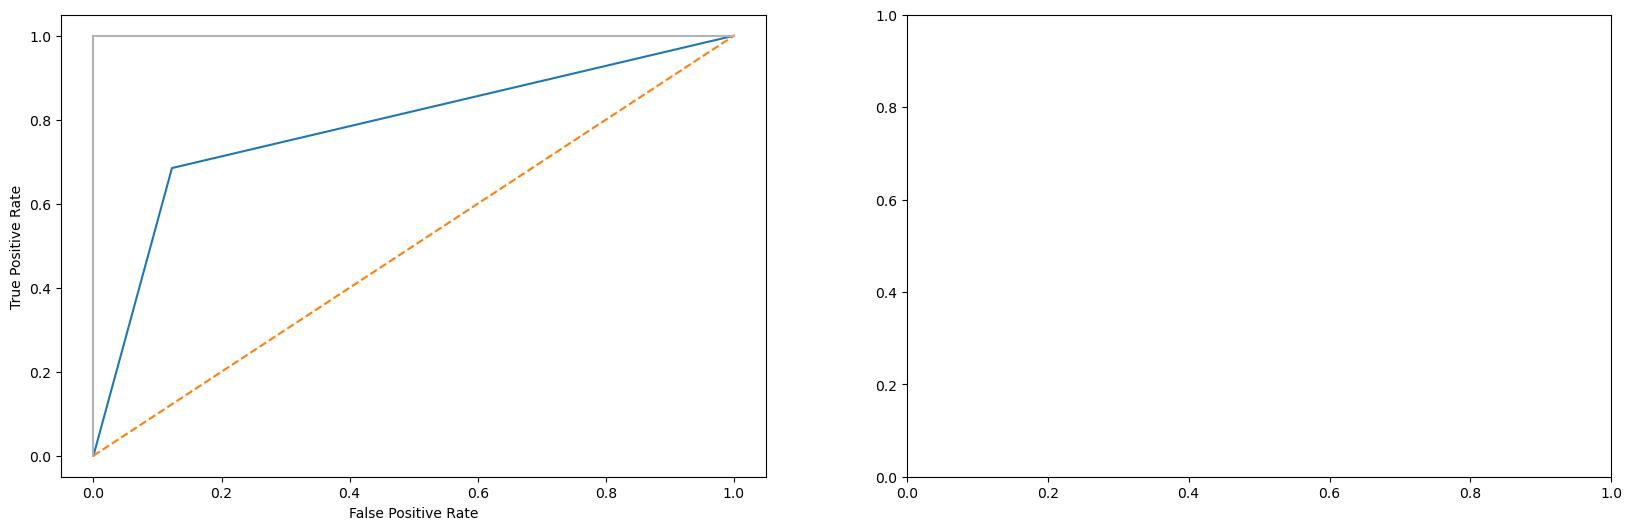

In [69]:
fpr_log,tpr_log,thres_log = roc_curve(y_test, y_pred_test)

fig, ax = plt.subplots(1,2,figsize=(20,6))
ax[0].plot(fpr_log,tpr_log)
ax[0].plot([0, 1], ls="--")
ax[0].plot([0, 0], [1, 0] , c=".7")
ax[0].plot([1, 1] , c=".7")
ax[0].set_ylabel('True Positive Rate')
ax[0].set_xlabel('False Positive Rate')
print(roc_auc_score(y_test, y_pred_test))

plt.show()

### Setting threshold to 0.75

In [70]:
logreg.predict(X_test)

array([1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0,
       1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 1])

In [71]:
logreg.predict_proba(X_test)

array([[0.07677751, 0.92322249],
       [0.93081247, 0.06918753],
       [0.11767741, 0.88232259],
       [0.29771846, 0.70228154],
       [0.22352498, 0.77647502],
       [0.9173384 , 0.0826616 ],
       [0.90261376, 0.09738624],
       [0.07592592, 0.92407408],
       [0.51943252, 0.48056748],
       [0.36580452, 0.63419548],
       [0.92380511, 0.07619489],
       [0.33679041, 0.66320959],
       [0.68968239, 0.31031761],
       [0.81113305, 0.18886695],
       [0.2978502 , 0.7021498 ],
       [0.56566701, 0.43433299],
       [0.71335515, 0.28664485],
       [0.94156498, 0.05843502],
       [0.93927358, 0.06072642],
       [0.4320324 , 0.5679676 ],
       [0.93401884, 0.06598116],
       [0.9176388 , 0.0823612 ],
       [0.03010494, 0.96989506],
       [0.7502649 , 0.2497351 ],
       [0.34023079, 0.65976921],
       [0.92677927, 0.07322073],
       [0.0687904 , 0.9312096 ],
       [0.18767055, 0.81232945],
       [0.79892062, 0.20107938],
       [0.03672796, 0.96327204],
       [0.

In [72]:
logreg.predict_proba(X_test)[:,1]

array([0.92322249, 0.06918753, 0.88232259, 0.70228154, 0.77647502,
       0.0826616 , 0.09738624, 0.92407408, 0.48056748, 0.63419548,
       0.07619489, 0.66320959, 0.31031761, 0.18886695, 0.7021498 ,
       0.43433299, 0.28664485, 0.05843502, 0.06072642, 0.5679676 ,
       0.06598116, 0.0823612 , 0.96989506, 0.2497351 , 0.65976921,
       0.07322073, 0.9312096 , 0.81232945, 0.20107938, 0.96327204,
       0.68360682, 0.42668544, 0.18368257, 0.59384178, 0.07066723,
       0.2468893 , 0.39132948, 0.06912648, 0.48630031, 0.08435591,
       0.658247  , 0.50522765, 0.8713097 , 0.34334031, 0.85953666,
       0.06192158, 0.17613165, 0.15932018, 0.68708866, 0.23899835,
       0.26150415, 0.8728124 , 0.22712904, 0.16784961, 0.07036136,
       0.60226065, 0.19062152, 0.27182652, 0.00913448, 0.69246294,
       0.0756445 , 0.10115742, 0.15353312, 0.34512333, 0.37313584,
       0.59849835, 0.06941795, 0.11068673, 0.62635558, 0.08548114,
       0.04367015, 0.27266889, 0.45978946, 0.06918753, 0.75566

In [73]:
logreg.predict_proba(X_test)[:,1] > 0.5

array([ True, False,  True,  True,  True, False, False,  True, False,
        True, False,  True, False, False,  True, False, False, False,
       False,  True, False, False,  True, False,  True, False,  True,
        True, False,  True,  True, False, False,  True, False, False,
       False, False, False, False,  True,  True,  True, False,  True,
       False, False, False,  True, False, False,  True, False, False,
       False,  True, False, False, False,  True, False, False, False,
       False, False,  True, False, False,  True, False, False, False,
       False, False,  True, False,  True, False, False,  True, False,
       False, False, False,  True, False, False, False, False,  True,
       False, False, False,  True, False,  True, False,  True, False,
       False,  True, False, False,  True,  True, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False,  True,  True,  True, False, False, False,  True,  True,
        True,  True,

In [74]:
np.where(logreg.predict_proba(X_test)[:,1] > 0.50, 1, 0)

array([1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0,
       1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 1])

In [75]:
logreg.predict(X_test)

array([1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0,
       1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 1])

In [76]:
preds1 = np.where(logreg.predict_proba(X_test)[:,1] > 0.75, 1, 0)
preds1

array([1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 0])

In [77]:
accuracy_score(y_test, preds1)

0.7318435754189944

### Setting threshold to 0.25

In [78]:
preds2 = np.where(logreg.predict_proba(X_test)[:,1] > 0.25, 1, 0)
preds2

array([1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1,
       0, 0, 1])

In [79]:
accuracy_score(y_test, preds2)

0.7486033519553073

In [81]:
numbers = [float(x)/10 for x in range(10)]
numbers

[0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]

In [82]:
y_pred_test = logreg.predict_proba(X_test)[:,1]

In [83]:
pred_val = np.where(logreg.predict_proba(X_test)[:,1] > 0.50, 1, 0)

In [84]:
cutoff_df = pd.DataFrame(zip(y_test, y_pred_test, pred_val), columns=['Actual','Predicted_Prob', 'Predicted'])
cutoff_df

Actual  Predicted_Prob  Predicted
0         1        0.923222          1
1         0        0.069188          0
2         1        0.882323          1
3         0        0.702282          1
4         1        0.776475          1
..      ...             ...        ...
174       1        0.921638          1
175       0        0.414601          0
176       0        0.088073          0
177       0        0.104817          0
178       1        0.559860          1

[179 rows x 3 columns]

In [85]:
# Let's calculate Sensitivity, Specificity and accuracy with different probability cutoffs 

numbers = [float(x)/10 for x in range(10)]

for i in numbers:
    cutoff_df[i]= cutoff_df.Predicted_Prob.map(lambda x: 1 if x > i else 0)
cutoff_df.head()


Actual  Predicted_Prob  Predicted  0.0  0.1  0.2  0.3  0.4  0.5  0.6  0.7  \
0       1        0.923222          1    1    1    1    1    1    1    1    1   
1       0        0.069188          0    1    0    0    0    0    0    0    0   
2       1        0.882323          1    1    1    1    1    1    1    1    1   
3       0        0.702282          1    1    1    1    1    1    1    1    1   
4       1        0.776475          1    1    1    1    1    1    1    1    1   

   0.8  0.9  
0    1    1  
1    0    0  
2    1    0  
3    0    0  
4    0    0

In [86]:
cutoff_df.shape

(179, 13)

In [87]:
from sklearn.metrics import confusion_matrix
# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives
num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
cutoff_df1 = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
for i in num:
    cm1 = confusion_matrix(cutoff_df.Actual, cutoff_df[i])
    total1=sum(sum(cm1))
    Accuracy = (cm1[0,0]+cm1[1,1])/total1
    Specificity = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    Sensitivity = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df1.loc[i] =[ i ,Accuracy,Sensitivity,Specificity]

In [88]:
cutoff_df1

prob  accuracy     sensi     speci
0.0   0.0  0.407821  1.000000  0.000000
0.1   0.1  0.620112  0.849315  0.462264
0.2   0.2  0.698324  0.821918  0.613208
0.3   0.3  0.787709  0.808219  0.773585
0.4   0.4  0.804469  0.739726  0.849057
0.5   0.5  0.798883  0.684932  0.877358
0.6   0.6  0.782123  0.602740  0.905660
0.7   0.7  0.754190  0.452055  0.962264
0.8   0.8  0.726257  0.342466  0.990566
0.9   0.9  0.675978  0.219178  0.990566

<IPython.core.display.Javascript object>


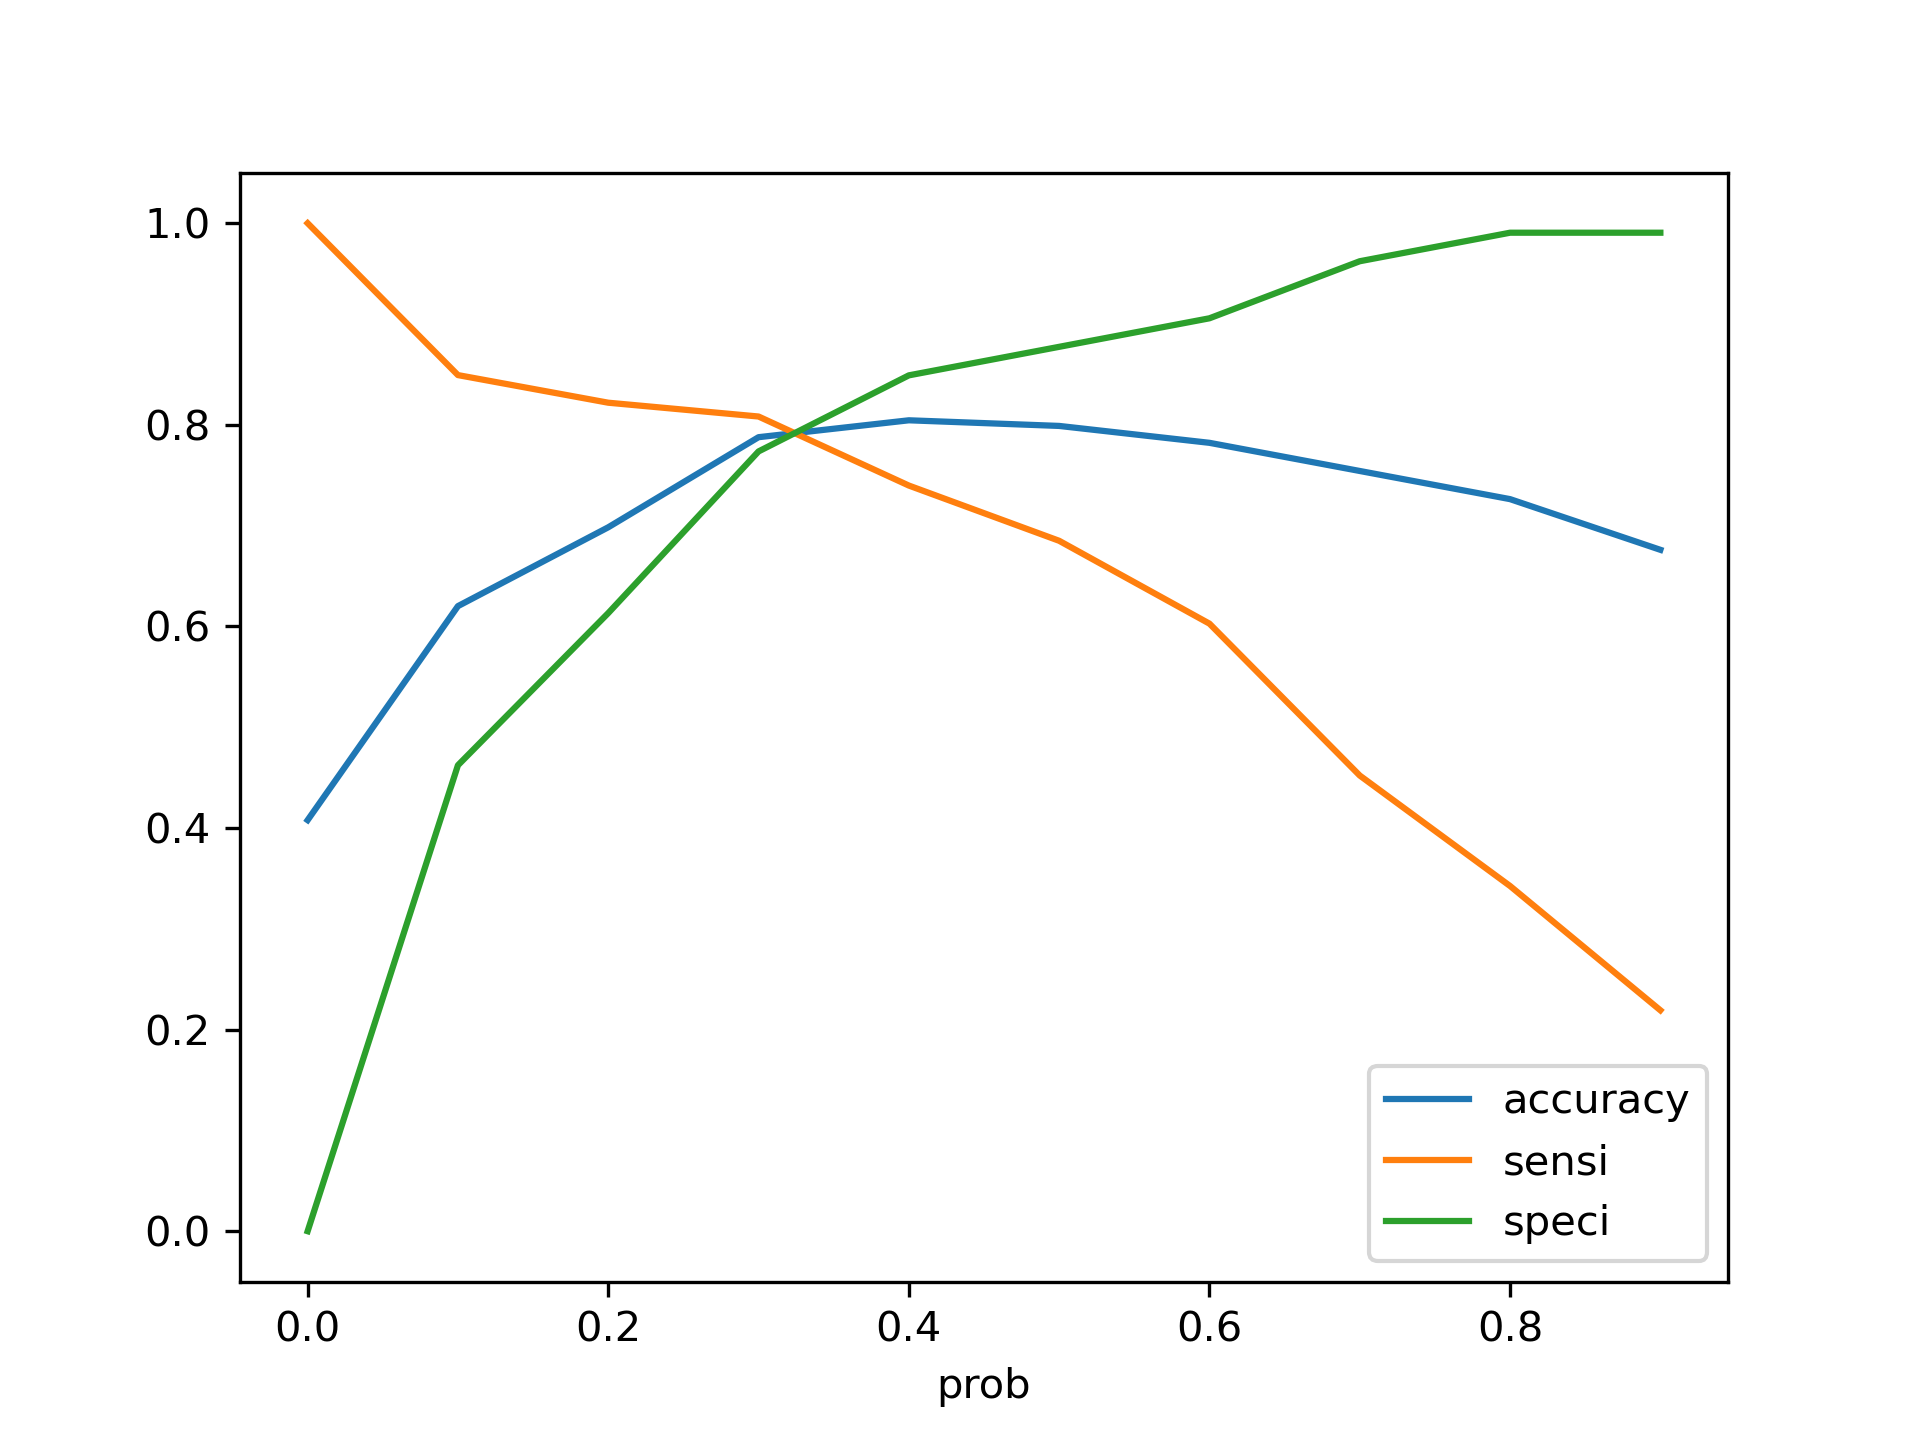

In [89]:
# Let's plot it as well
%matplotlib notebook
cutoff_df1.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

In [90]:
preds3 = np.where(logreg.predict_proba(X_test)[:,1] > 0.32, 1, 0)
preds3

array([1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 0, 1])

In [91]:
accuracy_score(y_test, preds3)

0.7988826815642458

# Happy Learning